In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [85]:
def get_graph_info(graph):
    print("Number of nodes:", graph.number_of_nodes())
    print("Number of edges:", graph.number_of_edges())
    print("Available nodes:", list(graph.nodes))
    print("Available edges:", list(graph.edges))
    if type(graph) == nx.classes.digraph.DiGraph:
        print("Connected components:", 
              list(nx.weakly_connected_components(directed_graph)))
    else:
        print("Connected components:", list(nx.connected_components(graph)))
    print("Node degree:", dict(undirected_graph.degree()))
    
def draw_graph(graph, figsize=(12,8), title=""):
    # reproducible chart
    np.random.seed(20)
    
    # graph type checking
    graph_type = ""
    fig, ax = plt.subplots(figsize=figsize)
    for n1, n2, attribute in graph.edges.data():
        if list(attribute.keys()) != []:
            graph_type = list(attribute.keys())[0]
        break
    for _, node_attribute in bipartite_graph.nodes(data=True):
        if 'bipartite' in node_attribute.keys():
            graph_type = "bipartite"
        break
    
    if graph_type == "sign":
        edge_color_dict = {1: "green", -1: "red"}
        edge_colors = [edge_color_dict[sign] for _, _, sign in graph.edges(data="sign")]
        nx.draw(graph, with_labels=True, edge_color=edge_colors, node_size=400, font_color='white')
    elif graph_type == "weight":
        pos = nx.spring_layout(graph)
        nx.draw(graph, pos, with_labels=True, font_color='white')
        edge_labels = dict([((n1, n2), weight) for n1, n2, weight in graph.edges(data="weight")])
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    elif graph_type == "relation":
        # create color mapping
        edge_color_dict = {0:'blue', 1:'red', 2:'green', 3:'orange', 4:'black'}
        relation_values = nx.get_edge_attributes(multigraph,'relation').values()
        unique_relations = list(set(relation_values))
        relation_color_dict = dict(zip(unique_relations , 
                                       [0] * len(unique_relations)))
        relation_index_dict = dict(zip(unique_relations , 
                                       [i for i in range(len(unique_relations))]))
        for i in range(len(unique_relations)):
            relation_color_dict[unique_relations[i]] = edge_color_dict[i]

        # draw nodes and node labels
        pos = nx.spring_layout(multigraph)
        nx.draw_networkx_nodes(multigraph, pos)
        nx.draw_networkx_labels(multigraph, pos, font_color='w')

        # draw edges with connection style of arc3 and specify the rad arguments
        for e in multigraph.edges(data="relation"):
            ax.annotate("",
                        xy=pos[e[0]], 
                        xycoords='data',
                        xytext=pos[e[1]], 
                        textcoords='data',
                        arrowprops=dict(
                            arrowstyle="-", 
                            color=relation_color_dict[e[2]],
                            shrinkA=5, shrinkB=5,
                            connectionstyle="arc3,rad=rrr".replace('rrr',
                                str(round(0.3*relation_index_dict[e[2]],2))),
                        ),
            )
        plt.axis('off')
    elif graph_type == "bipartite":
        # put L_set nodes at x=1 and R_set nodes at x=2
        L_set, R_set = bipartite.sets(graph)
        pos = dict()
        pos.update((n, (1, i)) for i, n in enumerate(L_set)) 
        pos.update((n, (2, i)) for i, n in enumerate(R_set))

        # create node color list for coloring
        node_colors = []
        for node, set_number in graph.nodes(data="bipartite"):
            if set_number == 1:
                node_colors.append("green")
            else:
                node_colors.append("blue")

        # draw the bipartite graph
        nx.draw(graph, pos=pos, with_labels=True,
                node_size=400, node_color=node_colors, font_color='white')
    else:
        nx.draw(graph, with_labels=True, font_color='white')
    plt.title(title)
    plt.show()
    
def write_edgelist(graph, filename, sep=",", data_attributes=False):
    try:
        nx.write_edgelist(graph, filename, delimiter=sep, data=data_attributes)
        print(filename, "is written sucessfully!")
    except:
        print(filename, "failed to write!")

## 1. Undirected graph

### 1.1 Create graph using `nx.Graph()` and `add_edge()`

In [3]:
%%time

# create graph by adding edges
undirected_graph = nx.Graph()
undirected_graph.add_edge('A','B')
undirected_graph.add_edge('B','C')
undirected_graph.add_edge('D','A')
undirected_graph.add_edge('E','F')

# display graph info
get_graph_info(undirected_graph)

Number of nodes: 6
Number of edges: 4
Available nodes: ['A', 'B', 'C', 'D', 'E', 'F']
Available edges: [('A', 'B'), ('A', 'D'), ('B', 'C'), ('E', 'F')]
Connected components: [{'C', 'B', 'A', 'D'}, {'F', 'E'}]
Node degree: {'A': 2, 'B': 2, 'C': 1, 'D': 1, 'E': 1, 'F': 1}
Wall time: 0 ns


### 1.2 Create graph using `nx.Graph()` class constructor

In [4]:
%%time

# create graph from edge list
edgelist = [('A', 'B'), ('A', 'D'), ('B', 'C'), ('E', 'F')]
undirected_graph = nx.Graph(edgelist)

# display graph info
get_graph_info(undirected_graph)

Number of nodes: 6
Number of edges: 4
Available nodes: ['A', 'B', 'D', 'C', 'E', 'F']
Available edges: [('A', 'B'), ('A', 'D'), ('B', 'C'), ('E', 'F')]
Connected components: [{'C', 'B', 'A', 'D'}, {'F', 'E'}]
Node degree: {'A': 2, 'B': 2, 'D': 1, 'C': 1, 'E': 1, 'F': 1}
Wall time: 2.05 ms


### 1.3 Create graph using `nx.from_pandas_edgelist()`

In [5]:
%%time
# create graph from pandas dataframe
relationships = pd.DataFrame({'from': ['A', 'A', 'B', 'E'], 
                              'to':   ['B', 'D', 'C', 'F']})
G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

# display graph info
get_graph_info(undirected_graph)

Number of nodes: 6
Number of edges: 4
Available nodes: ['A', 'B', 'D', 'C', 'E', 'F']
Available edges: [('A', 'B'), ('A', 'D'), ('B', 'C'), ('E', 'F')]
Connected components: [{'C', 'B', 'A', 'D'}, {'F', 'E'}]
Node degree: {'A': 2, 'B': 2, 'D': 1, 'C': 1, 'E': 1, 'F': 1}
Wall time: 178 ms


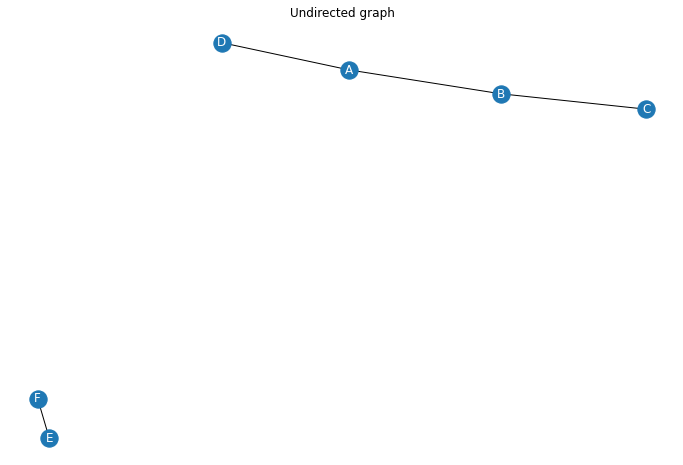

In [22]:
# visualize the undirected graph
draw_graph(undirected_graph, title="Undirected graph")

### 1.4 Export edge list to csv file

In [7]:
write_edgelist(undirected_graph, "edgelist_output/undirected_edgelist.csv")

edgelist_output/undirected_edgelist.csv is written sucessfully!


## 2. Directed graph

### 2.1 Create directed graph using `nx.DiGraph()` and `add_edge()`

In [8]:
%%time

# create graph by adding edges
directed_graph = nx.DiGraph()
directed_graph.add_edge('A','B')
directed_graph.add_edge('B','C')
directed_graph.add_edge('D','A')
directed_graph.add_edge('E','F')

# display graph info
get_graph_info(directed_graph)

Number of nodes: 6
Number of edges: 4
Available nodes: ['A', 'B', 'C', 'D', 'E', 'F']
Available edges: [('A', 'B'), ('B', 'C'), ('D', 'A'), ('E', 'F')]
Connected components: [{'C', 'B', 'A', 'D'}, {'F', 'E'}]
Node degree: {'A': 2, 'B': 2, 'D': 1, 'C': 1, 'E': 1, 'F': 1}
Wall time: 0 ns


### 2.2 Create graph using `nx.DiGraph()` class constructor

In [9]:
%%time

# create graph from edge list
edgelist = [('A', 'B'), ('A', 'D'), ('B', 'C'), ('E', 'F')]
directed_graph = nx.DiGraph(edgelist)

# display graph info
get_graph_info(directed_graph)

Number of nodes: 6
Number of edges: 4
Available nodes: ['A', 'B', 'D', 'C', 'E', 'F']
Available edges: [('A', 'B'), ('A', 'D'), ('B', 'C'), ('E', 'F')]
Connected components: [{'C', 'B', 'A', 'D'}, {'F', 'E'}]
Node degree: {'A': 2, 'B': 2, 'D': 1, 'C': 1, 'E': 1, 'F': 1}
Wall time: 0 ns


### 2.3 Create graph using `nx.from_pandas_edgelist()`

In [10]:
%%time
# create graph from pandas dataframe
relationships = pd.DataFrame({'from': ['A', 'A', 'B', 'E'], 
                              'to':   ['B', 'D', 'C', 'F']})
G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.DiGraph())

# display graph info
get_graph_info(directed_graph)

Number of nodes: 6
Number of edges: 4
Available nodes: ['A', 'B', 'D', 'C', 'E', 'F']
Available edges: [('A', 'B'), ('A', 'D'), ('B', 'C'), ('E', 'F')]
Connected components: [{'C', 'B', 'A', 'D'}, {'F', 'E'}]
Node degree: {'A': 2, 'B': 2, 'D': 1, 'C': 1, 'E': 1, 'F': 1}
Wall time: 15 ms


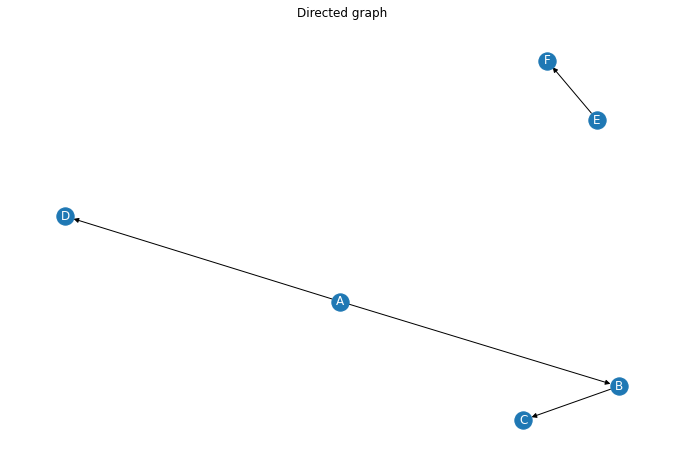

In [23]:
# visualize the directed graph
draw_graph(directed_graph, title="Directed graph")

### 2.4 Export edge list to csv file

In [12]:
write_edgelist(directed_graph, "edgelist_output/directed_edgelist.csv")

edgelist_output/directed_edgelist.csv is written sucessfully!


## 3. Signed graph

In [13]:
%%time

# create signed graph
signed_graph = nx.Graph()
signed_graph.add_edge('A','B', sign= 1)
signed_graph.add_edge('B','C', sign= -1)
signed_graph.add_edge('D','A', sign= 1)
signed_graph.add_edge('E','F', sign= -1)

# display graph info
get_graph_info(signed_graph)

Number of nodes: 6
Number of edges: 4
Available nodes: ['A', 'B', 'C', 'D', 'E', 'F']
Available edges: [('A', 'B'), ('A', 'D'), ('B', 'C'), ('E', 'F')]
Connected components: [{'C', 'B', 'A', 'D'}, {'F', 'E'}]
Node degree: {'A': 2, 'B': 2, 'D': 1, 'C': 1, 'E': 1, 'F': 1}
Wall time: 0 ns


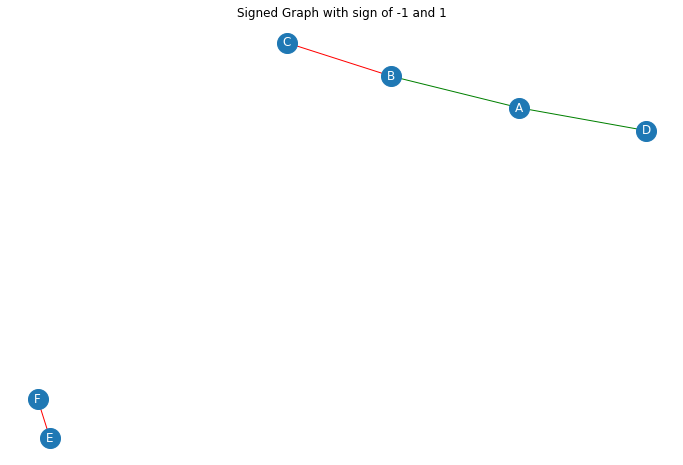

Wall time: 93.7 ms


In [24]:
%%time
draw_graph(signed_graph, title="Signed Graph with sign of -1 and 1")

### 3.2 Export edge list to csv file

In [15]:
write_edgelist(signed_graph, "edgelist_output/signed_edgelist.csv", data_attributes=["sign"])

edgelist_output/signed_edgelist.csv is written sucessfully!


## 4. Weighted graph

In [16]:
%%time

# create signed graph
weighted_graph = nx.Graph()
weighted_graph.add_edge('A','B', weight= 6)
weighted_graph.add_edge('B','C', weight= 13)
weighted_graph.add_edge('D','A', weight= 2)
weighted_graph.add_edge('E','F', weight= 20)

# display graph info
get_graph_info(weighted_graph)

Number of nodes: 6
Number of edges: 4
Available nodes: ['A', 'B', 'C', 'D', 'E', 'F']
Available edges: [('A', 'B'), ('A', 'D'), ('B', 'C'), ('E', 'F')]
Connected components: [{'C', 'B', 'A', 'D'}, {'F', 'E'}]
Node degree: {'A': 2, 'B': 2, 'D': 1, 'C': 1, 'E': 1, 'F': 1}
Wall time: 15 ms


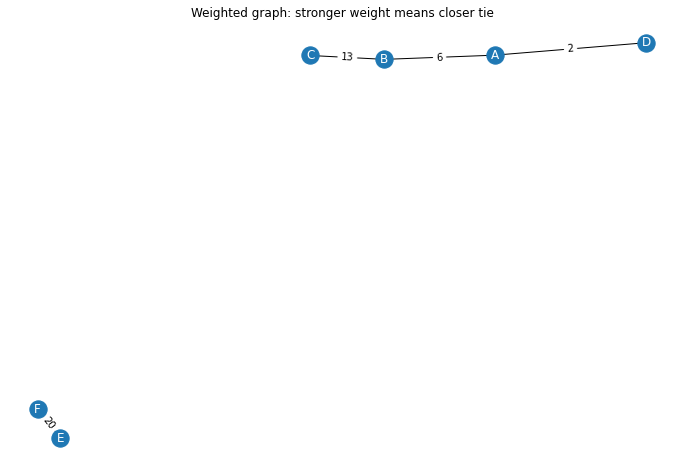

In [17]:
# visualize the directed graph
draw_graph(weighted_graph, title="Weighted graph: stronger weight means closer tie")

### 4.2 Export edge list to csv file

In [18]:
write_edgelist(weighted_graph, "edgelist_output/weighted_edgelist.csv", data_attributes=["weight"])

edgelist_output/weighted_edgelist.csv is written sucessfully!


## 5. Multigraph

In [70]:
multigraph = nx.MultiGraph()
multigraph.add_edge('A','B', relation= 'friend')
multigraph.add_edge('A','B', relation= 'neighbor')
multigraph.add_edge('A','B', relation= 'coworker')
multigraph.add_edge('B','C', relation= 'neighbor')
multigraph.add_edge('B','C', relation= 'family')
multigraph.add_edge('C','B', relation= 'coworker')
multigraph.add_edge('C','A', relation= 'coworker')
multigraph.add_edge('D','C', relation= 'coworker')
get_graph_info(multigraph)

Number of nodes: 4
Number of edges: 8
Available nodes: ['A', 'B', 'C', 'D']
Available edges: [('A', 'B', 0), ('A', 'B', 1), ('A', 'B', 2), ('A', 'C', 0), ('B', 'C', 0), ('B', 'C', 1), ('B', 'C', 2), ('C', 'D', 0)]
Connected components: [{'C', 'B', 'A', 'D'}]
Node degree: {'A': 2, 'B': 2, 'D': 1, 'C': 1, 'E': 1, 'F': 1}


dict_keys(['relation'])
relation


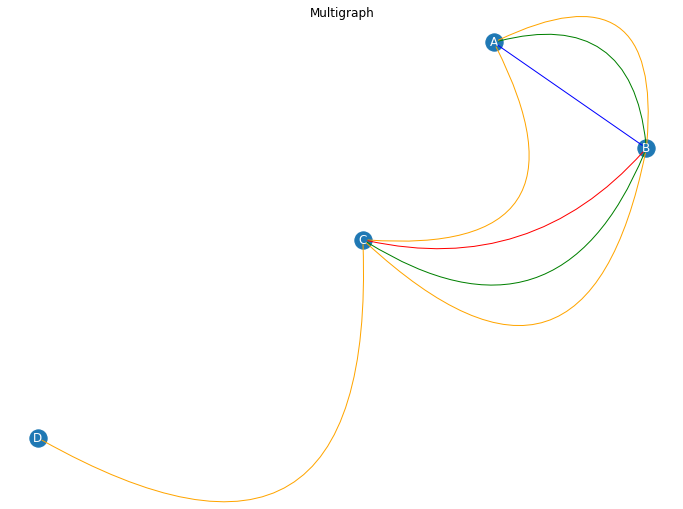

In [71]:
# visualize the directed graph
draw_graph(multigraph, title="Multigraph")

### 5.2 Export edge list to csv file

In [21]:
write_edgelist(multigraph, "edgelist_output/multigraph_edgelist.csv", data_attributes=["relation"])

edgelist_output/multigraph_edgelist.csv is written sucessfully!


## 6. Bipartite Graph

In [32]:
from networkx.algorithms import bipartite

In [35]:
%%time
bipartite_graph = nx.Graph()
bipartite_graph.add_nodes_from([1, 2, 3, 4], bipartite=0)
bipartite_graph.add_nodes_from(["a", "b", "c", "d"], bipartite=1)
bipartite_graph.add_edges_from([(1, "a"), (1, "b"), (1, "c"), (2, "a"), 
                  (2, "b"), (2, "d"), (3, "c"), (4, "a")])
get_graph_info(bipartite_graph)

Number of nodes: 8
Number of edges: 8
Available nodes: [1, 2, 3, 4, 'a', 'b', 'c', 'd']
Available edges: [(1, 'a'), (1, 'b'), (1, 'c'), (2, 'a'), (2, 'b'), (2, 'd'), (3, 'c'), (4, 'a')]
Connected components: [{1, 2, 3, 4, 'b', 'c', 'd', 'a'}]
Node degree: {'A': 2, 'B': 2, 'D': 1, 'C': 1, 'E': 1, 'F': 1}
Wall time: 995 µs


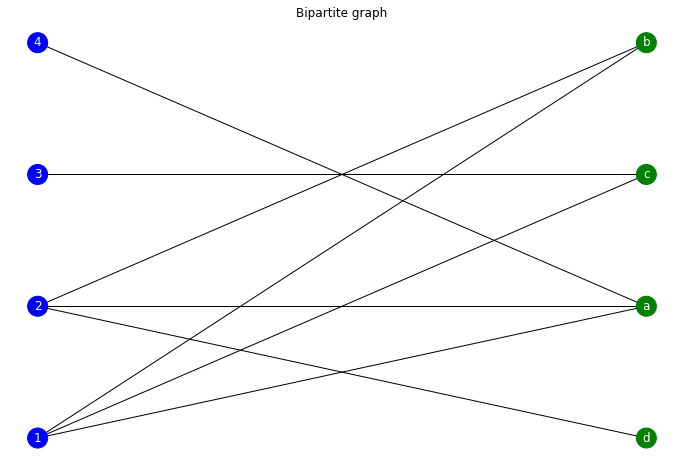

In [86]:
# visualize the graph
draw_graph(bipartite_graph, title="Bipartite graph")